In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from tensorflow.keras.layers import concatenate

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/ai/master/data/preprocessing/international-airline-passengers.csv',parse_dates=True)

In [ ]:
df.columns = ['date','Inter_Passengers']
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df = df.sort_index()
df.head()

,date,Inter_Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df = df.set_index('date')
df.head(5)

,Inter_Passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


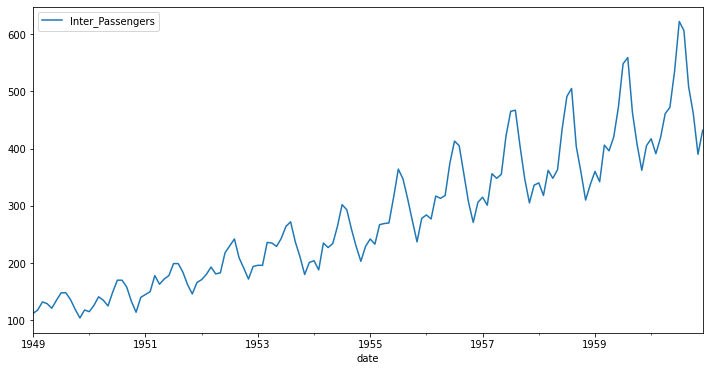

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
def split_sequence(seq, n_step):
    targets = []
    features = []
    for i in range(len(seq)):
        eidx = i + n_step
        if eidx > len(seq)-1:
            break
        target = seq[i:eidx]
        feature = seq[eidx]
        targets.append(target)
        features.append(feature)
    return np.array(targets), np.array(features)

In [ ]:
n_steps=3

In [ ]:
X, y = split_sequence(df['Inter_Passengers'], n_steps)
print('X shape: %s'%str(X.shape))
print('y shape: %s'%str(y.shape))

X shape: (141, 3)
y shape: (141,)


In [ ]:
for i in range(5):
  print('{} {:.2f}'.format(X[i, :], y[i]))

[112 118 132] 129.00
[118 132 129] 121.00
[132 129 121] 135.00
[129 121 135] 148.00
[121 135 148] 148.00


In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_dim = n_steps))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs = 50)

Epoch 1/50
5/5 [==============================] - 0s 5ms/step - loss: 3322.9358
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 3349.8906
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 3396.2883
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 3370.7354
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 3313.0129
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 3265.7739
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 3208.5156
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 3183.4231
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 3165.7168
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 3152.4395
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 3139.7239
Epoch 12/50
5/5 [==============================] - 0s 5ms/step - loss: 3121.2727
Epoch 13/50
5/5 [====================

In [ ]:
X_input = np.array(X[-5:]).reshape(-1, n_steps)
print(X_input)

[[472 535 622]
 [535 622 606]
 [622 606 508]
 [606 508 461]
 [508 461 390]]


In [ ]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_input)
print(yhat)

Actual value: [606 508 461 390 432]
Predict value:
1/1 [==============================] - 0s 59ms/step
[[539.8327]
 [585.1644]
 [583.6499]
 [534.6738]
 [459.1827]]


In [ ]:
#Hàm RMSE
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

5/5 [==============================] - 0s 2ms/step


166.2966949096413

<ipython-input-16-d4cb0366c2aa>:8: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  legend.get_frame().set_facecolor('C')


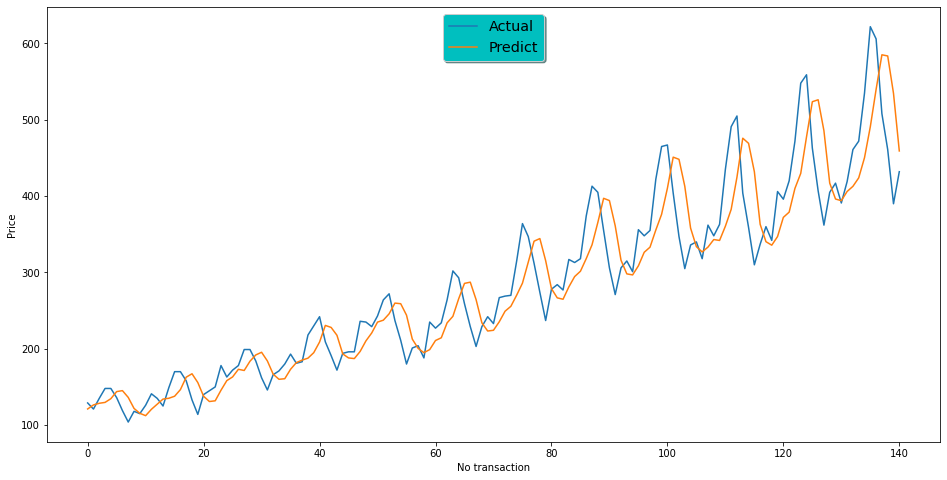

In [ ]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')
    legend.get_frame().set_facecolor('C')
    
plt_graph(y, yhat)

In [ ]:
plt.xlabel?